# Homework 1: Reading data and regression
## Due September 5th

In class we've been working on developing the tools for linear regression.  In this homework, we'll use those tools to show that one of the original 'big data' problems can be solved quite credibly with ordinary least squares.  Note that this exercise is primarily intended to do two things: 1) provide you with some practice gathering data, and 2) evaluate your ability to reason somewhat abstractly about models.  With respect to the second point, it is in your grade's interest to provide complete and well-reasoned answers to narrative questions posed.  A correct answer can be awarded very few points if its reasoning is absent or unclear, and an incorrect answer can be awarded full points if it is well argued.   

Please turn in your work via github classroom.

## The big one
If you've ever lived in an area prone to seismic activity, you know that people are always a little apprehensive about *the big one*, that giant earthquake (Magnitude greater than 7) that is going to break the pots and collapse the overpasses.  However, the big one rarely happens... until it does.  What happens more frequently is smaller earthquakes.  And even more frequently than that, even smaller earthquakes.  In fact, it's long been understood that earthquake frequency has an inverse relationship with magnitude.  Here, we're going to quantify that relationship for the west coast of the US.  

## Data wrangling
The first thing that we'll need to do is to aquire a dataset that can help us say something about earthquake frequency.  Fortunately, the United States Geologic Survey keeps such a database.  

First, navigate to https://earthquake.usgs.gov/earthquakes/search/.  This is the USGS' central repository for earthquake data.  We'll be interested in data from the last twenty years.  Enter the appropriate date.  Next, we're interested in data from the west coast of the lower 48.  Use the Custom Geographic Region button on the right side of the page, followed by the Draw Rectangle on the Map button.  Draw a rectangle around the west coast, from the Canadian to Mexican border.  Next, open the Output Options tab and select .csv (comma separated values, a plain text format).  Finally, under Limit Results, enter 19999 (the site will throw an error if you make this value bigger).  This series of commands will deliver the ~20k most recent earthquakes of all sizes to occur in this region of the world.  It may take a moment for their server to pull your query together. Download the file.

Next, import the data into ipython.  This is easily done with [Pandas' read_csv function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html).

In [1]:
# Use pandas to import the earthquake data file here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv('query.csv')

Interrogate the Pandas dataframe for the available fields using its built in method 'keys'


In [2]:
data.head()
data.columns
mag = data['mag']
print(np.min(mag))
print(np.max(mag))
print(np.mean(mag))


2.5
7.2
2.9476487095965926


We're primarily interested in determining the relationship between relative frequency and magnitude.  Extract the magnitude variable from the pandas data frame using the 'mag' key.  

Next, you'll need to determine the number of earthquakes that occured in the data as a function of magnitude.  This is easily done by deciding on a set of bins, and then counting the number of items in each bin.  This is also known as a [histogram](https://docs.scipy.org/doc/numpy/reference/generated/numpy.histogram.html), and is easily computed using either numpy or matplotlib.  You'll want to use a fairly large number of bins, say 50 (equally spaced).  *Note that the histogram function provided by either of the above libraries returns total counts rather than relative frequencies: you'll need to compute relative frequencies by dividing the returned counts by the total number of earthquakes in the dataset.*

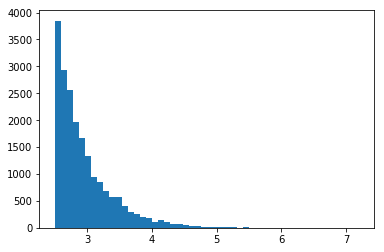

In [105]:
bins = np.linspace(np.min(mag),np.max(mag)+.00001,51) #This is 50 bins since we will be looking where the mag fits in between each
                                                      #between elements of bins.
y_bins = np.zeros(50)
for m in mag:
    for ndx in range(len(bins)-1):
        if m>=bins[ndx] and m < bins[ndx+1]:
            y_bins[ndx] += 1
plt.figure()
plt.hist(np.array(mag),bins = 50)
plt.show()

**(20 pts) Make a plot with bin centroids on the $x$-axis and relative frequency on the $y$-axis.  Based on your results, please provide a few sentences describing whether the model $y = w_0 + w_1 x$ is a good fit to the data, if $x$ represents earthquake magnitude and $y$ represents relative frequency.**

No, by inpspection the plot doesn't look remotely linear. The sharp initial decline and an asymptote of 0 suggest an exponential decay.  

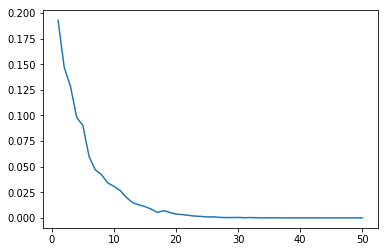

In [106]:
plt.figure()
plt.plot([x+1 for x in range(50)],y_bins)
plt.show()

As it turns out, a physical model that gives the predicted relative frequency of earthquakes of different magnitudes can be derived from physics, and is given by a so-called *power-law*
$$
y = ax^b
$$
**(20pts) If you wanted to directly fit this power-law model to these data, would you be able to use the linear regression code that we've already developed to do so?  If so, how?  If not, why not?**

Not directly. The model is not linear in the paramters. The derivatives will be diffrent then they were in the linear regression mode. 
To use the regression code we've already written we would have to take logs of both sides:
                                
                                log(y) = log(a) + log(x^b)
                                       = log(a) + b*log(x)
Then transform the data to y -> log(y) and x->log(x). Now we can use our linear regression code to determine b and log(a). Then compute a from log(a).

As it turns out, it is not possible to use linear regression to fit this model directly.  However, it can be done by using a clever transformation of the data.  **(20pts) Plot the base-10 logarithm of the event counts.  Now does a linear model seem like a good fit?  If the power law is a good fit to the untransformed data, why does it make sense that a linear model should fit the log-transformed data (HINT: take the logarithm of both sides of the power law)**

The log plot definitly looks like it could be fit with a linear model. I dont think the power law is a good fit, but an exponetial $y = ae^{b*x}$ would be. To see why first consdier the power law:
                                
                                log(y) = log(a*x^b)
                                       = log(a) + log(x^b)
                                       = log(a) + b*log(x)
                                       
                           log(y) is logarithmic with respect to x, not linear like we 
                           observe in the plot.
Now consider the exponential model:
                                
                                log(y) = log(a*e^(bx))
                                       = log(a) + log(e^(bx))
                                       = log(a) + bx
                                       
                             log(y) is linear in x with slope b and intercept log(a). 
                             So an exponential model is consistant with our plot.
                                
                                
                        
                        
                        
               
               

        
              
               

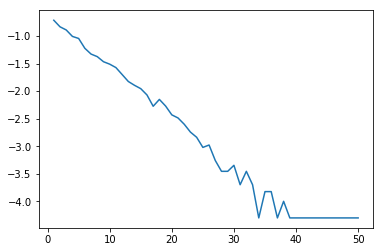

In [107]:
plt.figure()
#Don't want to be taking the log(0) will return np.nan so will add the minimm value to the zero values.
for k in range(len(y_bins)):
    if y_bins[k] == 0:
        y_bins[k] = y_bins[-1]
plt.plot([x+1 for x in range(50)],np.log10((y_bins)))

plt.show()


Finally, **(40pts) use one of the methods that you developed for linear regression in class to fit a line to the log-transformed counts.  What is the slope of that line?  Is the model a good fit for all sizes of earthquake?**

Will use the normal equations to minmize $\sum_{i}{(log(y_i) - (w_0 + w_1*x_i))^{2}}$ with respect to $w_{0}$ and $w_{1}$.

The model is not a good fit for very large earthquakes. Apperently they happen more then an exponential model would suggest.

The model would fit better if we removed the last 10 bins or so. 

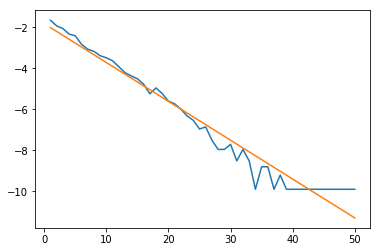

In [108]:
x = np.array([ndx for ndx in range(1,51)])

x.reshape(len(x),1)
xx = np.ones((len(x),2))
xx[:,1] = x

y_log = np.log(y_bins)
w = np.linalg.solve(xx.T@xx,xx.T@y_log)
#y_hat = np.exp(w[0])*(x**w[1])


plt.figure()
plt.plot(x,y_log,x,xx@w)
plt.show()



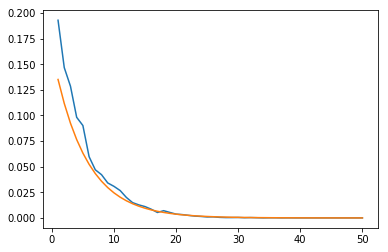

In [109]:
plt.figure()
plt.plot(x,y_bins,x,np.exp(w[0])*np.exp(w[1]*x))

I think the model is only doing poorly on the small earthquakes because we made it fit the outlier large earthquakes.

The model only looks good on large earth quakes because everything is close to zero out there.

In [3]:
import os

In [9]:
os.getcwd()

'C:\\Users\\Tony'